# Amazon Recommendation System Project

## Project Outline

### 1. Data Cleaning and Preprocessing
- Load the dataset from Kaggle.
- Handle missing values and remove duplicates.
- Convert data types as necessary.
- Normalize and standardize numerical features.
- Encode categorical variables.

### 2. Clustering and Segmentation
- Select relevant features for clustering.
- Scale features to ensure uniformity.
- Apply clustering algorithms (e.g., K-Means, DBSCAN).
- Evaluate clustering performance and visualize clusters.
- Interpret and analyze the resulting customer segments.

### 3. Recommendation System
- Choose an appropriate recommendation algorithm (e.g., collaborative filtering, content-based filtering).
- Train the recommendation model on the preprocessed data.
- Validate and test the recommendation model.
- Generate recommendations for users.
- Evaluate the recommendation system’s performance using relevant metrics.

---

By following these steps, we aim to build a robust recommendation system tailored for Amazon's diverse customer base.


Starting by importing neccessary Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [10]:

# Import from drive
from google.colab import drive
drive.mount('/content/drive')

# Correct the file path
file_path = '/content/drive/MyDrive/Ds project/susac project/amazon.csv'

# displaying of our dataset
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [3]:
df = pd.read_csv('amazon.csv')
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

let's remove the `euro currency ₹`notation in our columns that will help us to further analyziz since we have one currecy in our dataset
, remove `percentage%` sign in discount_percentage column and `rating_count` has ',' notation which need to be removed 

In [4]:
# list columns that has currency notation and percentage
col_with_currency = ['discounted_price','actual_price']

# remove currency notation and percentage
for col in col_with_currency:
    df[col] = df[col].apply(lambda x:x[1:])
    
# remove the % percentage
df['discount_percentage'] = df['discount_percentage'].apply(lambda x: x.replace('%', ''))

# Correcting the rating_count column
df['rating_count'] = df['rating_count'].apply(lambda x: str(x).replace(',', ''))

# check of corrected  df
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...              399   
1  Computers&Accessories|Accessories&Peripherals|...              199   
2  Computers&Accessories|Accessories&Peripherals|...              199   
3  Computers&Accessories|Accessories&Peripherals|...              329   
4  Computers&Accessories|Accessories&Peripherals|...              154   

  actual_price discount_percentage rating rating_count  \
0        1,099                  64    4.2        24269   
1          349                  43    4.0        43994   
2        1,899                  90    3.9         7928   
3          699                  53    4.2        94363   
4          399                  61    4.2        16905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

#### renaming columns
`product_name` ,`user_id`

In [5]:
# renaming of columns 
df.rename(columns={'product_name': 'Description', 'user_id': 'CustomerID'}, inplace=True)
df.head()

product_id                                        Description  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...              399   
1  Computers&Accessories|Accessories&Peripherals|...              199   
2  Computers&Accessories|Accessories&Peripherals|...              199   
3  Computers&Accessories|Accessories&Peripherals|...              329   
4  Computers&Accessories|Accessories&Peripherals|...              154   

  actual_price discount_percentage rating rating_count  \
0        1,099                  64    4.2        24269   
1          349                  43    4.0        43994   
2        1,899                  90    3.9         7928   
3          699                  53    4.2        94363   
4          399                  61    4.2        16905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                          CustomerID  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

##### checking the information of columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   Description          1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1465 non-null   object
 8   about_product        1465 non-null   object
 9   CustomerID           1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

#### discounted_price ,actual_price,rating,rating_count ,discount_percentage have object datatype we need to change into number format

In [7]:
# convevert categorical column into number format
feature = ['discounted_price' ,'actual_price','rating','rating_count' ,'discount_percentage']


# Clean and convert the columns
for col in feature:
    # Ensure all values are treated as strings
    df[col] = df[col].astype(str)
    
    # Replace commas and percentage signs
    df[col] = df[col].str.replace(',', '').str.replace('%', '')
    
    # Replace 'NA' and '|' with NaN
    df[col] = df[col].replace({'NA': np.nan, '|': np.nan})
    
    # Convert to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [8]:
# checking of column  dtypes
df.info()
# df= df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   Description          1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   CustomerID           1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

##### Check for missing values

In [9]:
print('...checking for missing values')
missing_val = df.isnull().sum()
missing_val_perc = df.isnull().mean() * 100
for col in df.columns:
    if missing_val[col] > 0:
        print(f'The {col} column has {missing_val[col]} missing values ({missing_val_perc[col].round(2)}%)')
        

...checking for missing values
The rating column has 1 missing values (0.07%)
The rating_count column has 2 missing values (0.14%)


In [10]:
# since we don't loosing high maount on data we can drop it
df = df.dropna()
# check the missed value
if df.isnull().sum().any() >0:
    print('There is  missed value')
else:
    print('There is no missed value !')

There is no missed value !


In [11]:
#check for duplicates
len(df[df.duplicated])

0

To load all these cell of cleaning data is time consuming ,we can create the **data pipeline** for **data cleaning** instead of running all above cell 

In [181]:
# def data_pipeline(csv_path):
#     """
#     Load data from a CSV file, perform data cleaning, and return the cleaned DataFrame.

#     Parameters:
#     - csv_file (str): The path to the CSV file.

#     Returns:
#     - DataFrame: The cleaned DataFrame.
#     """
#     print('...loading the CSV file')
#     try:
#         # Load the CSV file from the specified path
#         df = pd.read_csv(csv_path)
#         print(f'The {csv_path} is loaded successfully')
        
#         # Checking the DataFrame info
#         print(f'The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns')
#         print('\nThe columns info:')
#         print(df.info())
        
#         # List columns that have currency notation and percentage
#         col_with_currency = ['discounted_price', 'actual_price']
        
#         # Remove currency notation
#         for col in col_with_currency:
#             df[col] = df[col].apply(lambda x: x[1:] if isinstance(x, str) else x)
        
#         # Remove the percentage symbol
#         df['discount_percentage'] = df['discount_percentage'].apply(lambda x: x.replace('%', '') if isinstance(x, str) else x)
        
#         # Correcting the rating_count column
#         df['rating_count'] = df['rating_count'].apply(lambda x: str(x).replace(',', '') if isinstance(x, str) else x)
        
#         print("The euro currency, percentage symbol, and commas are removed!")
        
#         # Renaming columns
#         df.rename(columns={'product_name': 'Description', 'user_id': 'CustomerID'}, inplace=True)
#         print("Columns renamed!")
        
#         # Check for missing values
#         print('...checking for missing values')
#         missing_val = df.isnull().sum()
#         missing_val_perc = df.isnull().mean() * 100
#         for col in df.columns:
#             if missing_val[col] > 0:
#                 print(f'The {col} column has {missing_val[col]} missing values ({missing_val_perc[col].round(2)}%)')
        
#         # Drop rows with missing 'rating_count' values
#         df.dropna(subset=['rating_count'], inplace=True)
        
#         # Check for any remaining missing values
#         if df.isnull().sum().any():
#             print('There are still missing values')
#         else:
#             print('There are no missing values!')
        
#         # Converting object columns into numeric types
#         df[col_with_currency + ['discount_percentage', 'rating_count']] = df[col_with_currency + ['discount_percentage', 'rating_count']].apply(pd.to_numeric, errors='coerce')
#         print('Converted object columns to numeric types')
        
#         # Final check of the DataFrame
#         print(df.info())
#         print(df.isnull().sum())
#         print('All done!')
        
#         return df
#     except Exception as e:
#         print(f"An error occurred: {e}")


In [183]:
df_cleaned = data_pipeline('amazon.csv')


In [22]:
#  display cleaned_df
df_cleaned

### EDA

In [184]:
df.head()

product_id                                        Description  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                   64     4.2       24269.0   
1         349.0                   43     4.0       43994.0   
2        1899.0                   90     3.9        7928.0   
3         699.0                   53     4.2       94363.0   
4         399.0                   61     4.2       16905.0   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                          CustomerID  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [185]:
df['img_link']

0       https://m.media-amazon.com/images/W/WEBP_40237...
1       https://m.media-amazon.com/images/W/WEBP_40237...
2       https://m.media-amazon.com/images/W/WEBP_40237...
3       https://m.media-amazon.com/images/I/41V5FtEWPk...
4       https://m.media-amazon.com/images/W/WEBP_40237...
                              ...                        
1460    https://m.media-amazon.com/images/I/41fDdRtjfx...
1461    https://m.media-amazon.com/images/I/41gzDxk4+k...
1462    https://m.media-amazon.com/images/W/WEBP_40237...
1463    https://m.media-amazon.com/images/W/WEBP_40237...
1464    https://m.media-amazon.com/images/W/WEBP_40237...
Name: img_link, Length: 1462, dtype: object

In [186]:
# stastical analysis
df.describe()

discounted_price   actual_price  discount_percentage       rating  \
count       1462.000000    1462.000000          1462.000000  1462.000000   
mean        3129.981826    5453.087743            47.672367     4.096717   
std         6950.548042   10884.467444            21.613905     0.289497   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000            32.000000     4.000000   
50%          799.000000    1670.000000            50.000000     4.100000   
75%         1999.000000    4321.250000            63.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  
count    1462.000000  
mean    18307.376881  
std     42766.096572  
min         2.000000  
25%      1191.500000  
50%      5179.000000  
75%     17342.250000  
max    426973.000000

<Axes: xlabel='actual_price'>

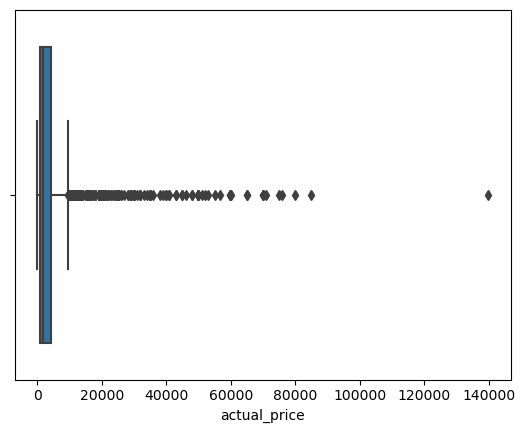

In [19]:
# ploting customer id per category
sns.boxplot(data = df, x = 'actual_price')

### segmentation and Clustering

In [188]:
df2 = pd.read_csv('amazon.csv')
df2['category'].unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [20]:
# forming the segmentation df 

seg_df = df[['CustomerID', 'Description']]
seg_df.head()

CustomerID  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                         Description  
0  Wayona Nylon Braided USB to Lightning Fast Cha...  
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...  
2  Sounce Fast Phone Charging Cable & Data Sync U...  
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...  
4  Portronics Konnect L 1.2M Fast Charging 3A 8 P...

In [21]:
# importing neccessary libaries for segmentation and Clustering

In [22]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [23]:
grouped_df = df.groupby('CustomerID')['Description'].apply(lambda x: ' '.join(x)).reset_index()
grouped_df.head()

CustomerID  \
0  AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZA...   
1  AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS...   
2                       AE242TR3GQ6TYC6W4SJ5UYYKBTYQ   
3  AE27UOZENYSWCQVQRRUQIV2ZM7VA,AGMYSLV6NNOAYES25...   
4  AE2JTMRKTUOIVIZWS2WDGTMNTU4Q,AF4QXCB32VC2DVE7O...   

                                         Description  
0  Universal Remote Control for All Sony TV for A...  
1  Bajaj Rex 500W Mixer Grinder with Nutri-Pro Fe...  
2  7SEVEN® Compatible for Tata Sky Remote Origina...  
3  Nokia 105 Single SIM, Keypad Mobile Phone with...  
4  Belkin Apple Certified Lightning To Type C Cab...

In [24]:
# Check if a word is a noun based on its part of speech tag
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, column='Description'):
    # Initialize a stemmer for English
    stemmer = nltk.stem.SnowballStemmer("english")

    # Dictionaries to hold root words, their keywords, and counts
    keywords_roots = dict()  # To collect the words / root
    keywords_select = dict()  # Association: root <-> keyword
    count_keywords = dict()  # Count occurrences of each root
    category_keys = []  # List to hold the selected keywords

    # Loop through each entry in the specified column of the dataframe
    for s in dataframe[column]:
        # Skip null entries
        if pd.isnull(s):
            continue

        # Convert text to lowercase
        lines = s.lower()

        # Tokenize the text into words
        tokenized = nltk.word_tokenize(lines)

        # Extract nouns from the tokenized words
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]

        # Process each noun
        for t in nouns:
            t = t.lower()  # Convert noun to lowercase
            root = stemmer.stem(t)  # Stem the noun to get its root

            # If the root is already in the dictionary, update it
            if root in keywords_roots:
                keywords_roots[root].add(t)
                count_keywords[root] += 1
            else:
                # Otherwise, add the new root to the dictionaries
                keywords_roots[root] = {t}
                count_keywords[root] = 1

    # Select representative keywords for each root
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:
            # If multiple words share the same root, select the shortest one
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    key = k
                    min_length = len(k)
            category_keys.append(key)
            keywords_select[s] = key
        else:
            # If only one word is associated with a root, select it directly
            single_word = list(keywords_roots[s])[0]
            category_keys.append(single_word)
            keywords_select[s] = single_word

    # Print the number of keywords identified
    print("Nb of keywords in variable '{}': {}".format(column, len(category_keys)))

    # Return the results
    return category_keys, keywords_roots, keywords_select, count_keywords




In [25]:
# Ensure nltk resources are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Nb of keywords in variable 'Description': 2413


In [26]:
# Make list of word count and sort so we can know what to use
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

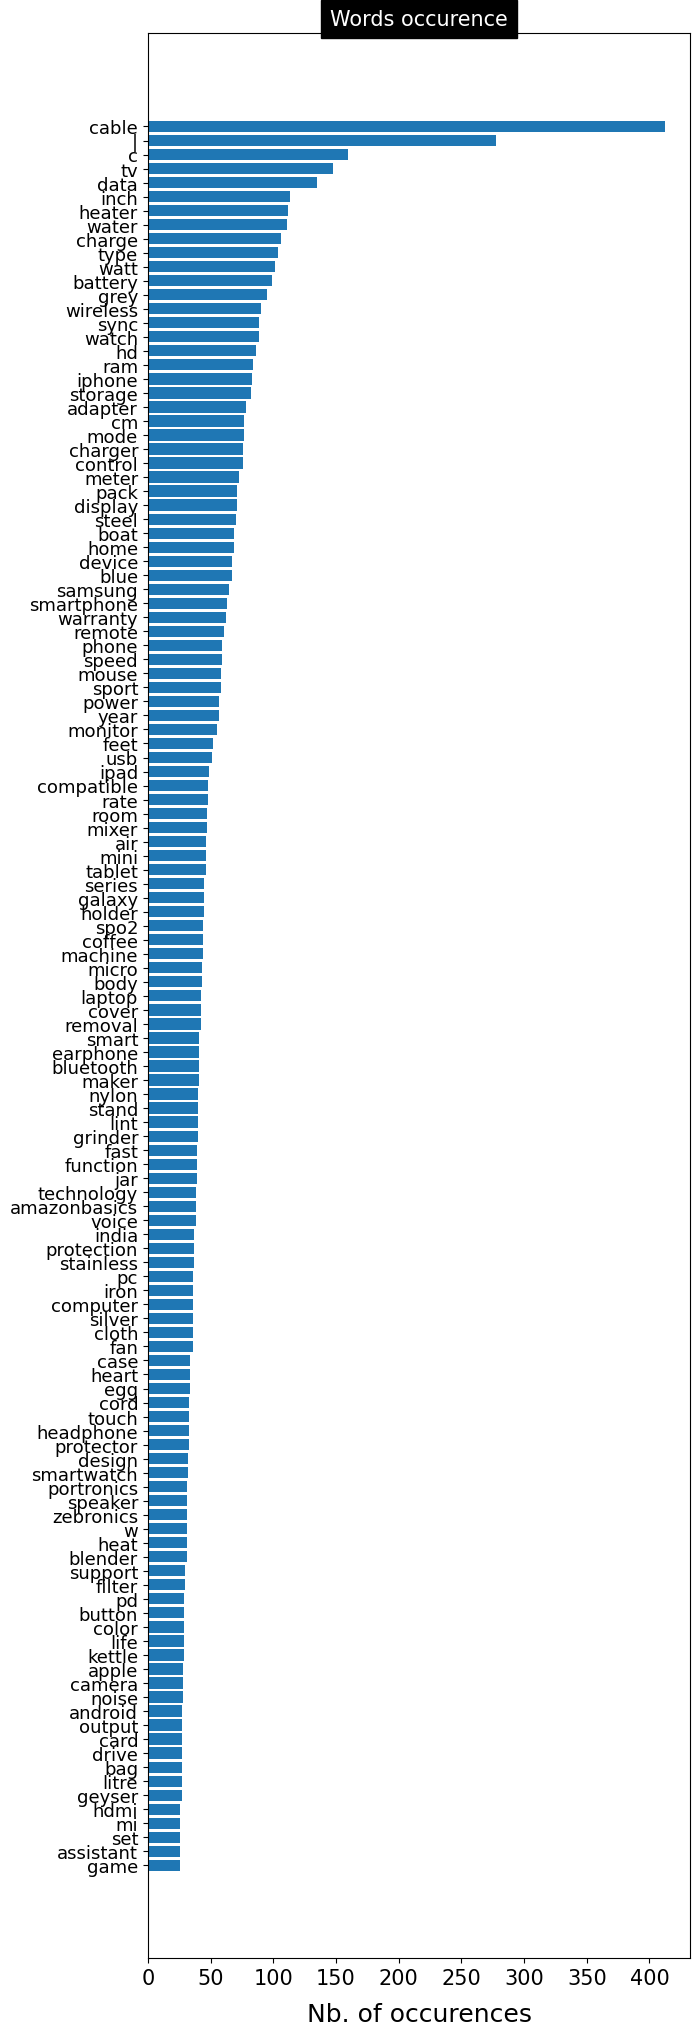

In [27]:
# Visualize above list
liste = sorted(list_products, key = lambda x:x[1], reverse = True)
#_______________________________
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#_______________________________________________________________________________________
plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 15)
plt.show()

In [28]:
# this code is to remove colours and irellevant words
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['|', 'blue', 'w', 'c', 'white', 'black', 'grey']: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
#______________________________________________________
list_products.sort(key = lambda x:x[1], reverse = True)
print('now we have:', len(list_products))

now we have: 2247


### NLP process 
1.tokenization
2.making tolowercase
3.lemmatization

those steps must be applied to 
 `Description column` for text processing and preparation for Clustering


In [29]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and non-alphabetic characters, and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the 'description' column
df['Description'] = df['Description'].apply(preprocess_text)

# Display the cleaned descriptions
df['Description']

0       wayona nylon braided usb lightning fast chargi...
1       ambrane unbreakable fast charging braided type...
2       sounce fast phone charging cable data sync usb...
3       boat deuce usb micro usb stress resistant stur...
4       portronics konnect l fast charging pin usb cab...
                              ...                        
1460    noir aqua pp spun filter spanner type ro water...
1461    prestige delight prwo electric rice cooker l w...
1462    bajaj majesty watt heat convector room heater ...
1463       havells ventil air dsp exhaust fan pista green
1464             borosil jumbo grill sandwich maker black
Name: Description, Length: 1462, dtype: object

In [30]:

df

product_id                                        Description  \
0     B07JW9H4J1  wayona nylon braided usb lightning fast chargi...   
1     B098NS6PVG  ambrane unbreakable fast charging braided type...   
2     B096MSW6CT  sounce fast phone charging cable data sync usb...   
3     B08HDJ86NZ  boat deuce usb micro usb stress resistant stur...   
4     B08CF3B7N1  portronics konnect l fast charging pin usb cab...   
...          ...                                                ...   
1460  B08L7J3T31  noir aqua pp spun filter spanner type ro water...   
1461  B01M6453MB  prestige delight prwo electric rice cooker l w...   
1462  B009P2LIL4  bajaj majesty watt heat convector room heater ...   
1463  B00J5DYCCA     havells ventil air dsp exhaust fan pista green   
1464  B01486F4G6           borosil jumbo grill sandwich maker black   

                                               category  discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             399.0   
1     Computers&Accessories|Accessories&Peripherals|...             199.0   
2     Computers&Accessories|Accessories&Peripherals|...             199.0   
3     Computers&Accessories|Accessories&Peripherals|...             329.0   
4     Computers&Accessories|Accessories&Peripherals|...             154.0   
...                                                 ...               ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             379.0   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...            2280.0   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...            2219.0   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...            1399.0   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...            2863.0   

      actual_price  discount_percentage  rating  rating_count  \
0           1099.0                   64     4.2       24269.0   
1            349.0                   43     4.0       43994.0   
2           1899.0                   90     3.9        7928.0   
3            699.0                   53     4.2       94363.0   
4            399.0                   61     4.2       16905.0   
...            ...                  ...     ...           ...   
1460         919.0                   59     4.0        1090.0   
1461        3045.0                   25     4.1        4118.0   
1462        3080.0                   28     3.6         468.0   
1463        1890.0                   26     4.0        8031.0   
1464        3690.0                   22     4.3        6987.0   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                             CustomerID  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                             

#### TF-IDF Vectorizer
will transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions. TF-IDF Vectorizer is a measure of originality of a word by comparing the number of times a word appears in document with the number of documents the word appears in.


In [31]:
vectorizer =TfidfVectorizer()
vectorizer_matrix =vectorizer.fit_transform(df['Description'])

In [32]:
vector_df = pd.DataFrame(vectorizer_matrix.toarray(),columns =vectorizer.get_feature_names_out())
vector_df

aa  aaa   ab  abode   ac  access  accessory  ace  acer  acidity  ...  \
0     0.0  0.0  0.0    0.0  0.0     0.0        0.0  0.0   0.0      0.0  ...   
1     0.0  0.0  0.0    0.0  0.0     0.0        0.0  0.0   0.0      0.0  ...   
2     0.0  0.0  0.0    0.0  0.0     0.0        0.0  0.0   0.0      0.0  ...   
3     0.0  0.0  0.0    0.0  0.0     0.0        0.0  0.0   0.0      0.0  ...   
4     0.0  0.0  0.0    0.0  0.0     0.0        0.0  0.0   0.0      0.0  ...   
...   ...  ...  ...    ...  ...     ...        ...  ...   ...      ...  ...   
1457  0.0  0.0  0.0    0.0  0.0     0.0        0.0  0.0   0.0      0.0  ...   
1458  0.0  0.0  0.0    0.0  0.0     0.0        0.0  0.0   0.0      0.0  ...   
1459  0.0  0.0  0.0    0.0  0.0     0.0        0.0  0.0   0.0      0.0  ...   
1460  0.0  0.0  0.0    0.0  0.0     0.0        0.0  0.0   0.0      0.0  ...   
1461  0.0  0.0  0.0    0.0  0.0     0.0        0.0  0.0   0.0      0.0  ...   

      zigma  zinc  zinq  zio  zip  zipper  zodo  zoom  zoul  zuvexa  
0       0.0   0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0     0.0  
1       0.0   0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0     0.0  
2       0.0   0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0     0.0  
3       0.0   0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0     0.0  
4       0.0   0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0     0.0  
...     ...   ...   ...  ...  ...     ...   ...   ...   ...     ...  
1457    0.0   0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0     0.0  
1458    0.0   0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0     0.0  
1459    0.0   0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0     0.0  
1460    0.0   0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0     0.0  
1461    0.0   0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0     0.0  

[1462 rows x 2547 columns]

In [203]:
len(matrix_df),len(df)

(1191, 1191)

###  Dimensional reduction techniques

#### let's first use Principal component analysis (PCA)

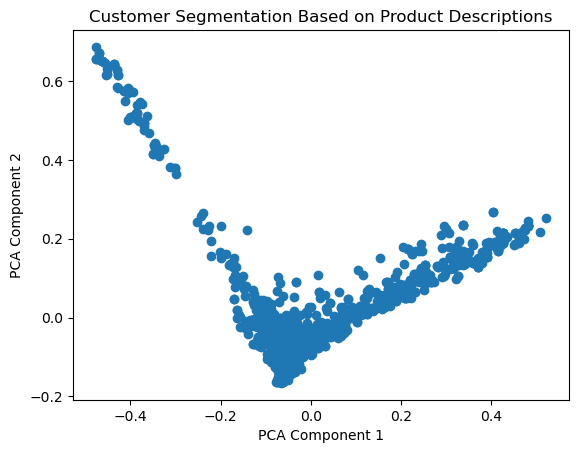

In [34]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components = 2,random_state= 42)
x_pca = pca.fit_transform(vectorizer_matrix.toarray())

plt.scatter(x_pca[:,0],x_pca[:,1],cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation Based on Product Descriptions')
plt.show()


#### Finding optimal clustering number

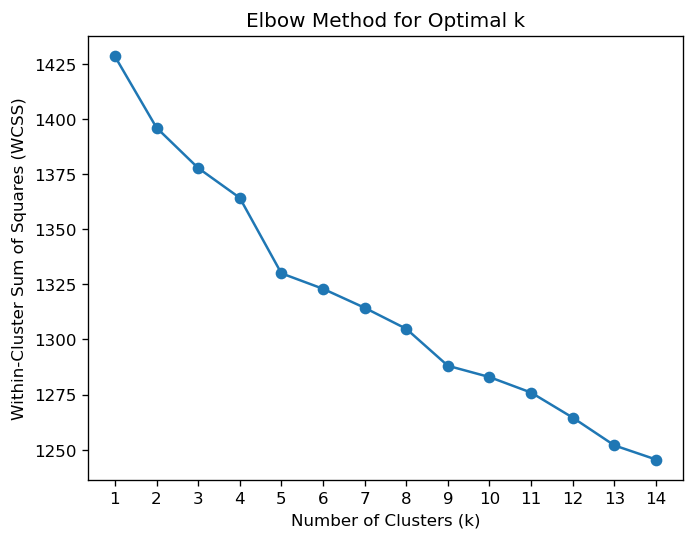

In [35]:
wcss= []
for i in range(1,15):
    km = KMeans(n_clusters = i,random_state=42)
    km.fit(vectorizer_matrix.toarray())
    wcss.append(km.inertia_)

# Plot the elbow curve
plt.figure(dpi=120)
plt.plot(range(1,15),wcss,marker ='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 15))
plt.show()

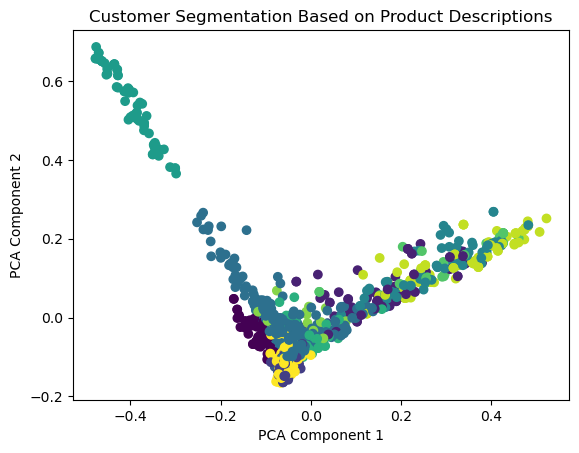

In [36]:
# Clustering

k = 12
km = KMeans(n_clusters = k,random_state =42)
df['cluster'] = km.fit_predict(vectorizer_matrix.toarray())

# visualize the clusters
plt.scatter(x_pca[:,0],x_pca[:,1],c= df['cluster'],cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation Based on Product Descriptions')
plt.show()

####   Apply t-distributed stochastic neighbor embedding  (TSNE )

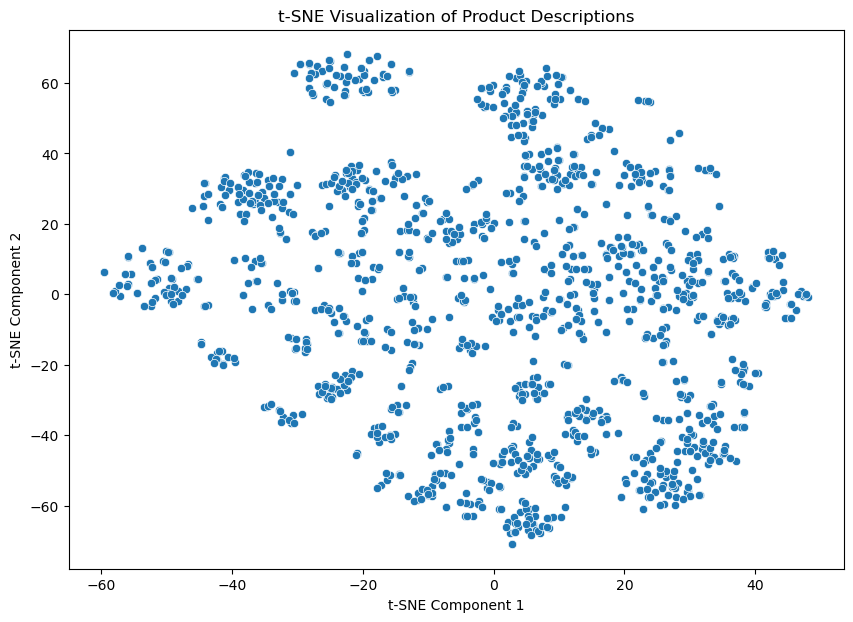

In [38]:
from sklearn.manifold import TSNE
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_matrix = tsne.fit_transform(vectorizer_matrix.toarray())

# Create a DataFrame with t-SNE components for visualization
tsne_df = pd.DataFrame(tsne_matrix, columns=['tsne_1', 'tsne_2'])

# Plot the t-SNE components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization of Product Descriptions')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

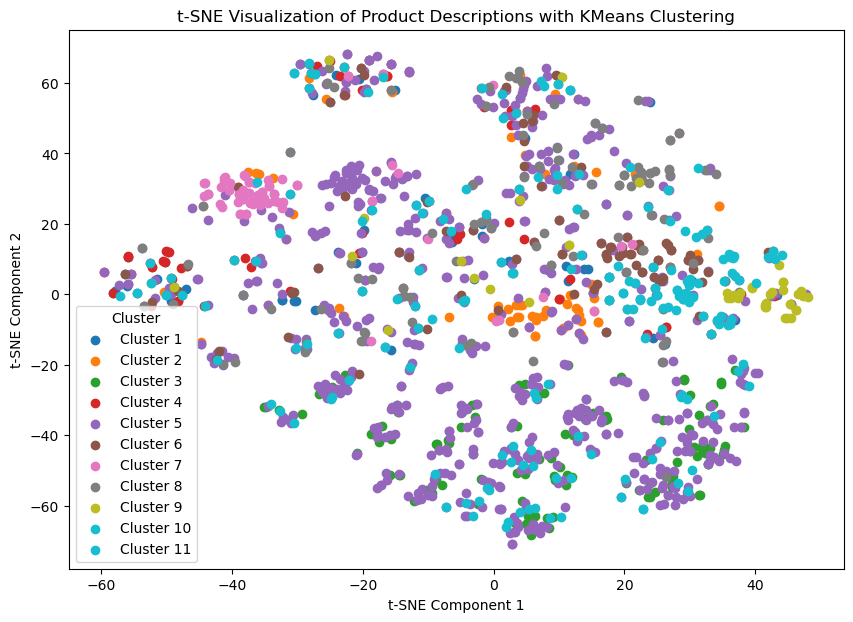

In [39]:
# Clustering

k = 11
km = KMeans(n_clusters = k,random_state =42)
df['cluster'] = km.fit_predict(vectorizer_matrix.toarray() )

# Create a DataFrame with t-SNE components and cluster labels
tsne_df = pd.DataFrame(tsne_matrix, columns=['tsne_1', 'tsne_2'])
tsne_df['cluster'] = df['cluster']

# Plot the t-SNE components with cluster labels using Matplotlib
plt.figure(figsize=(10, 7))

# Define a color map for the clusters
colors = plt.cm.get_cmap('tab10', k)

# Plot each cluster with a different color
for cluster in range(k):
    cluster_points = tsne_df[tsne_df['cluster'] == cluster]
    plt.scatter(cluster_points['tsne_1'], cluster_points['tsne_2'], label=f'Cluster {cluster + 1}', c=[colors(cluster)])

plt.title('t-SNE Visualization of Product Descriptions with KMeans Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

#### Apply UMAP

UMAP is based on the concept of manifold learning. It assumes that the data lies on a manifold of lower dimension than the original space, and it seeks to preserve the topological structure of this manifold

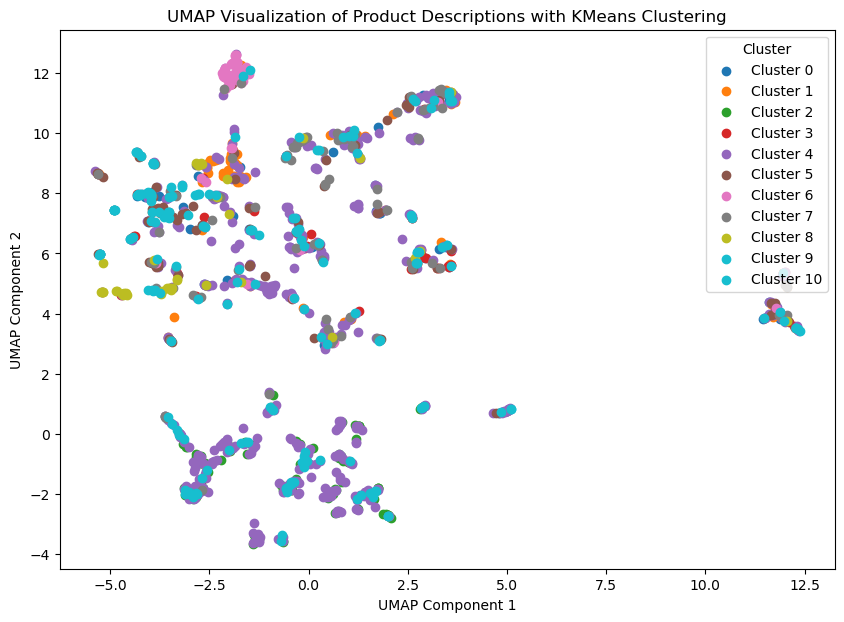

In [40]:
import umap


k = 11
km = KMeans(n_clusters = k,random_state =42)
df['cluster'] = km.fit_predict(vectorizer_matrix.toarray())


# Apply UMAP on the TF-IDF matrix
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_matrix = umap_model.fit_transform(vectorizer_matrix.toarray())

# Create a DataFrame with UMAP components and cluster labels
umap_df = pd.DataFrame(umap_matrix, columns=['umap_1', 'umap_2'])
umap_df['cluster'] = df['cluster']

# Plot the UMAP components with cluster labels using Matplotlib
plt.figure(figsize=(10, 7))

# Define a color map for the clusters
colors = plt.cm.get_cmap('tab10', k)

# Plot each cluster with a different color
for cluster in range(k):
    cluster_points = umap_df[umap_df['cluster'] == cluster]
    plt.scatter(cluster_points['umap_1'], cluster_points['umap_2'], label=f'Cluster {cluster}', c=[colors(cluster)])

plt.title('UMAP Visualization of Product Descriptions with KMeans Clustering')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Cluster')
plt.show()

let's visualize the prodcut in the clusters using Worldcloud

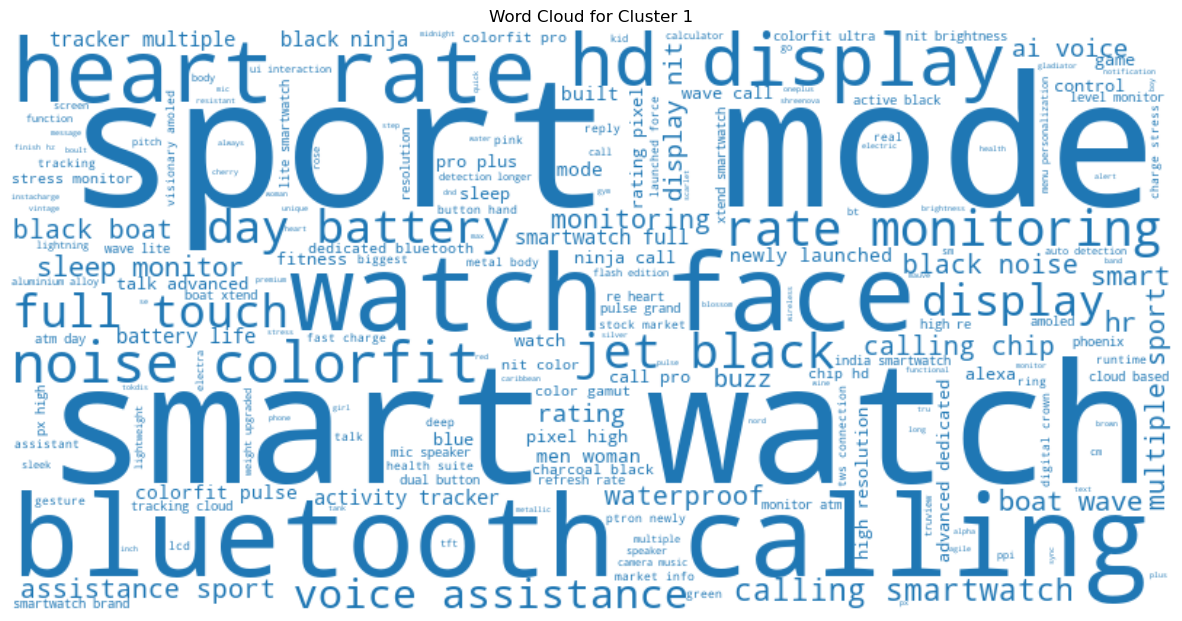

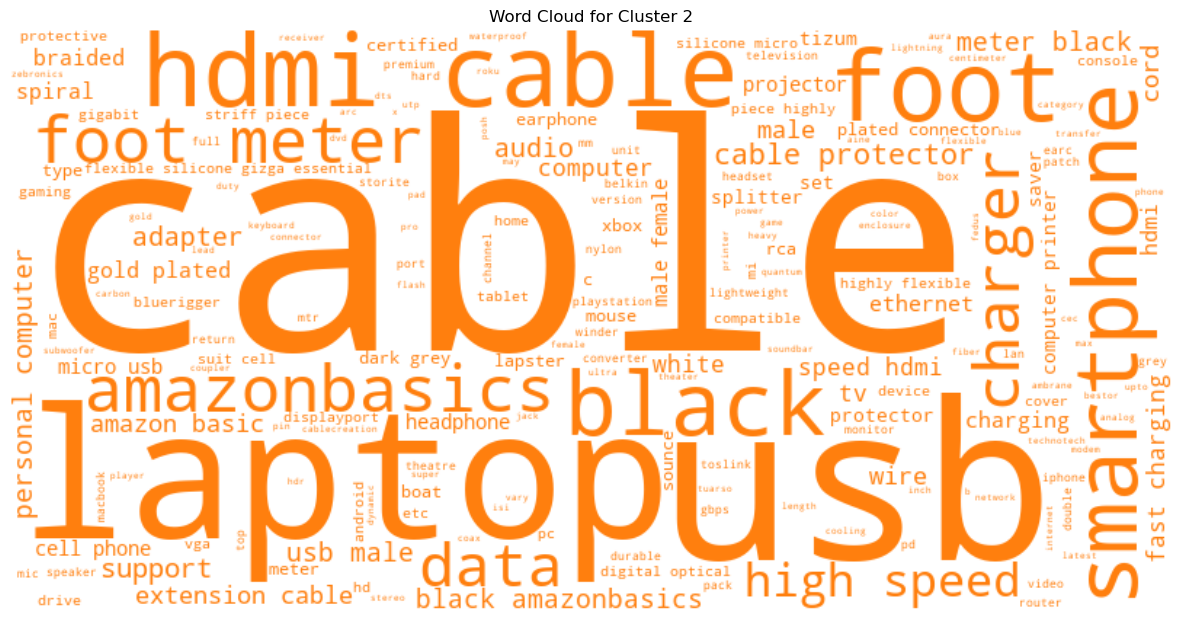

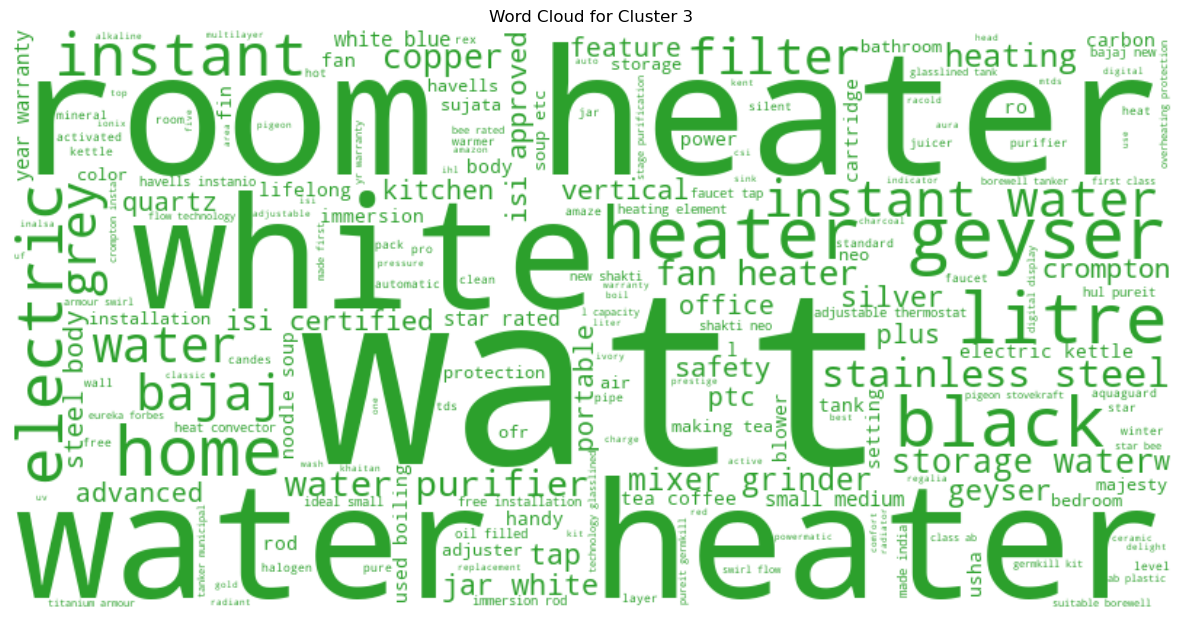

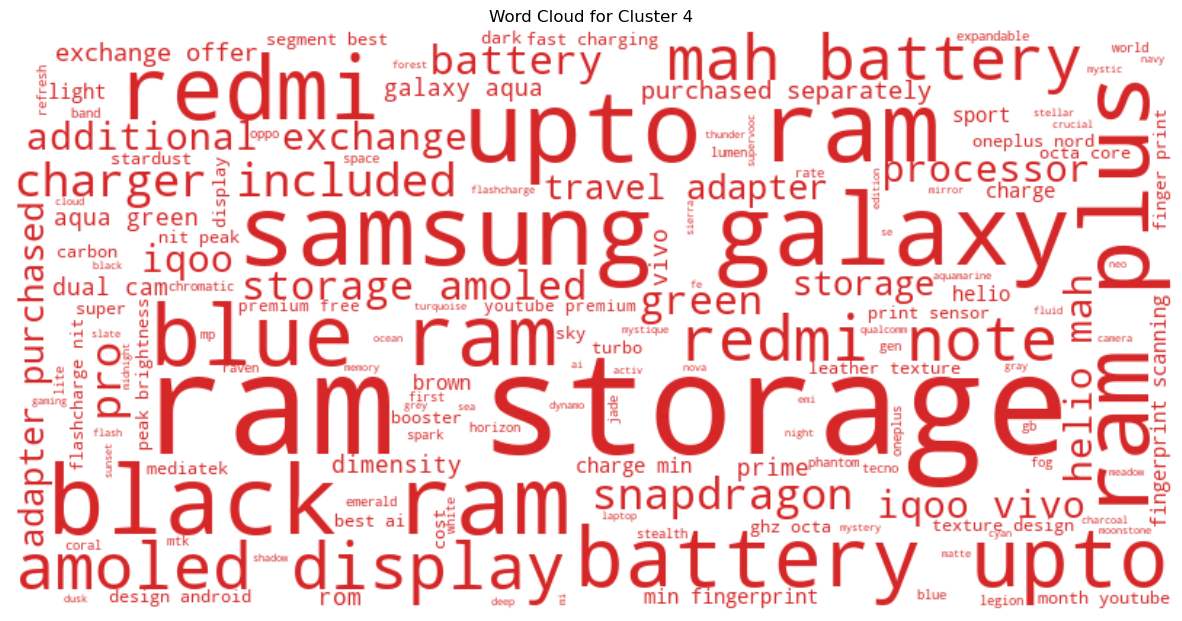

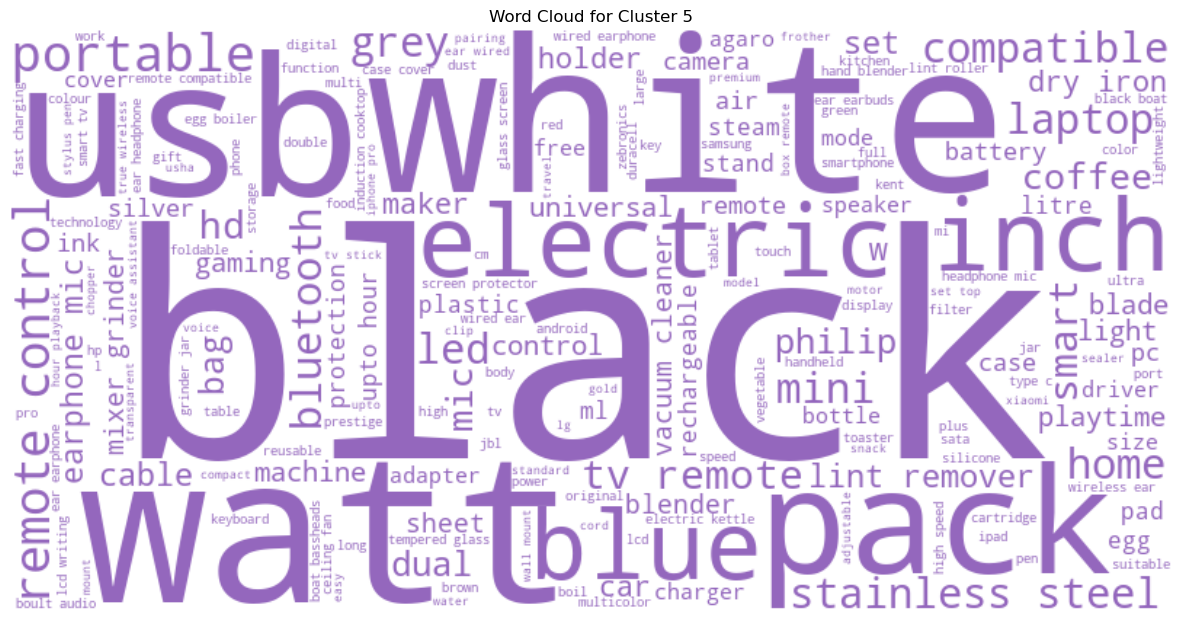

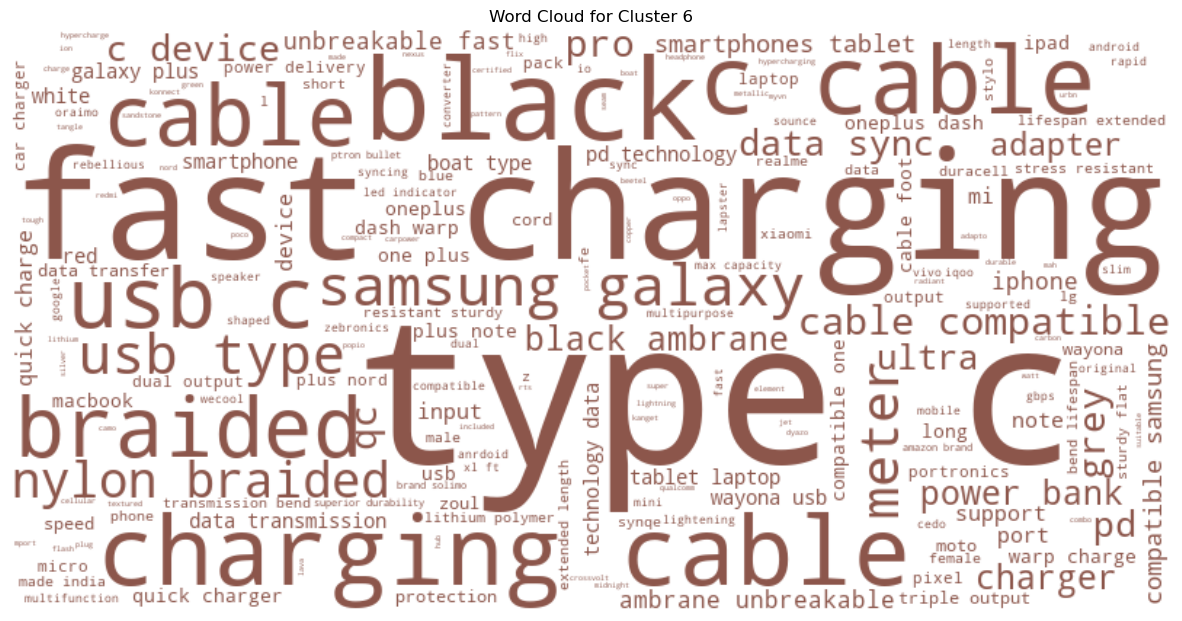

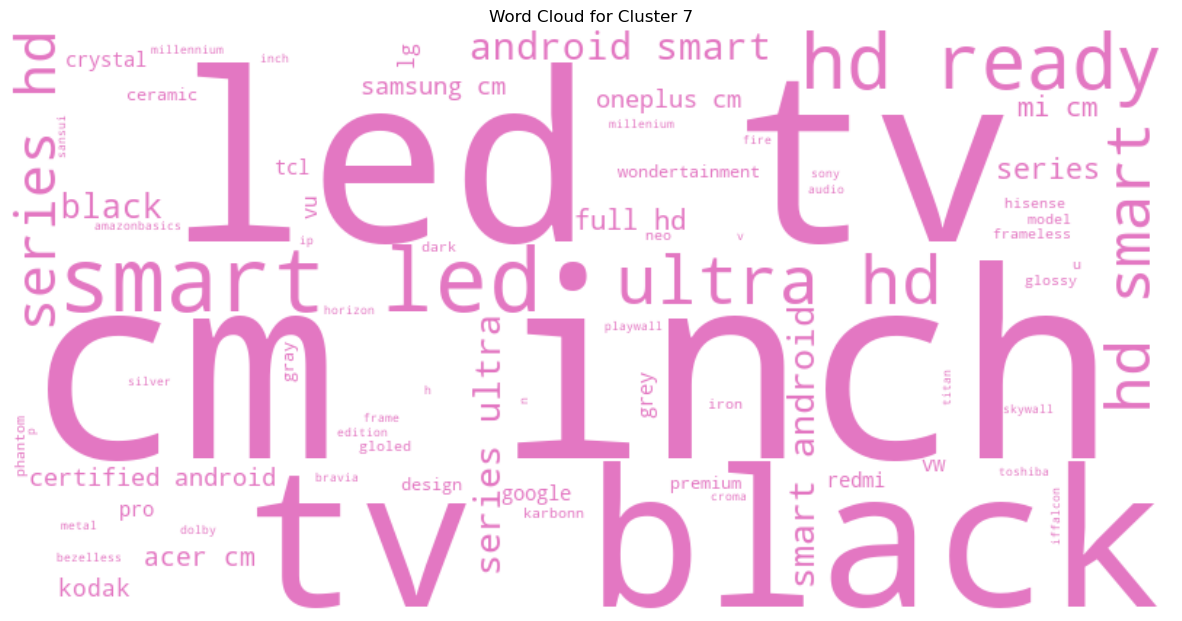

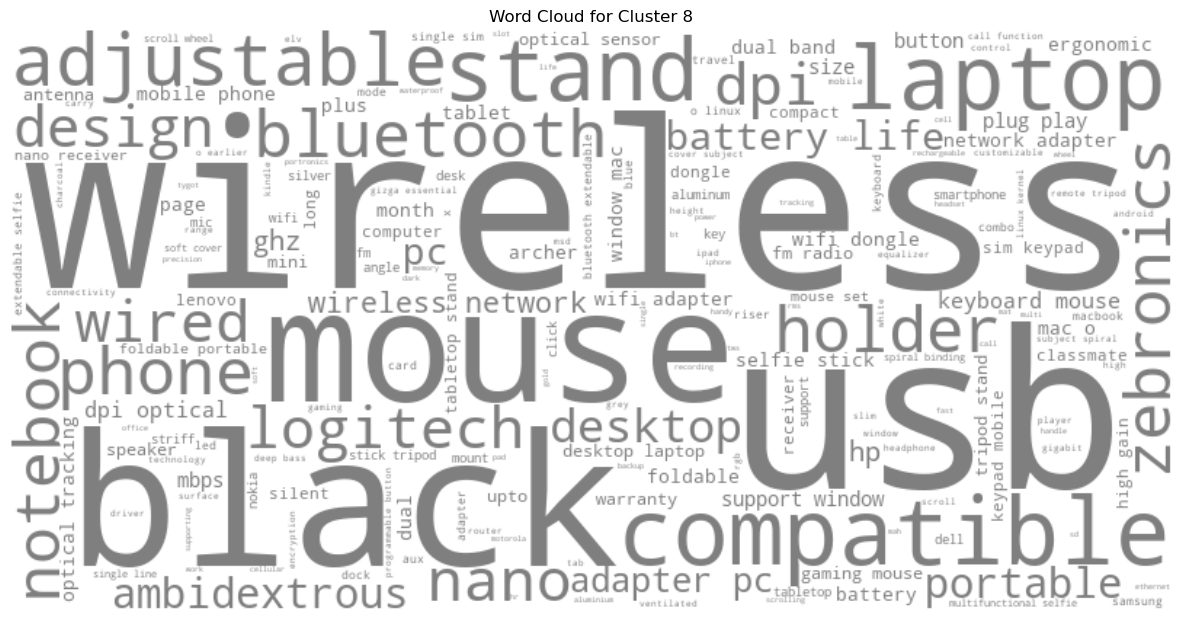

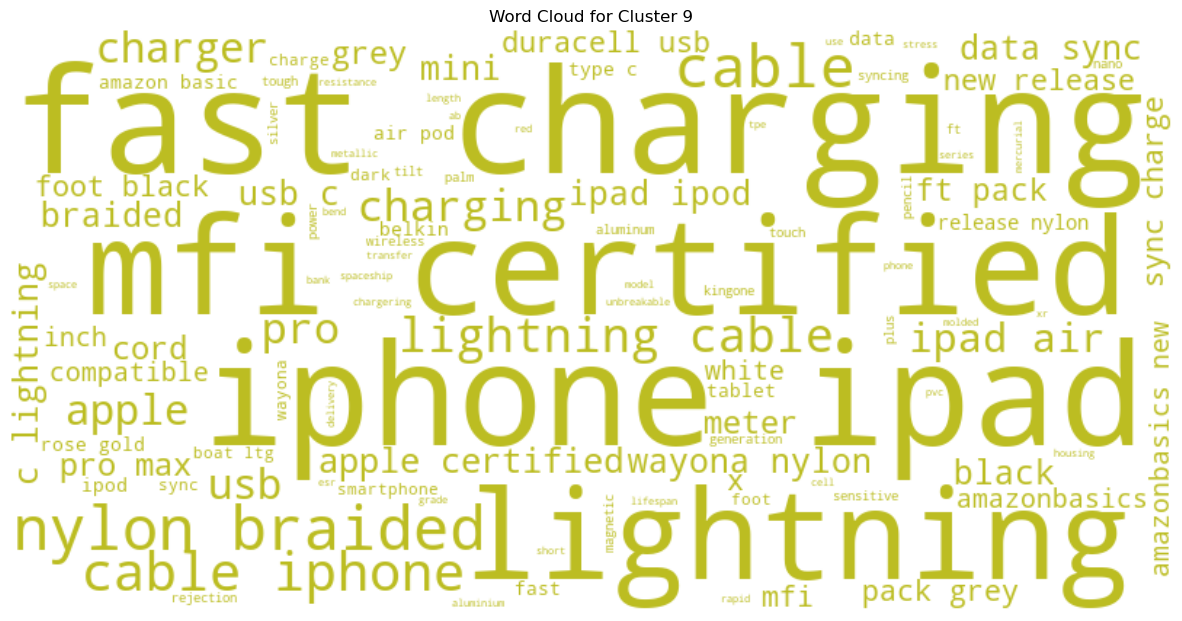

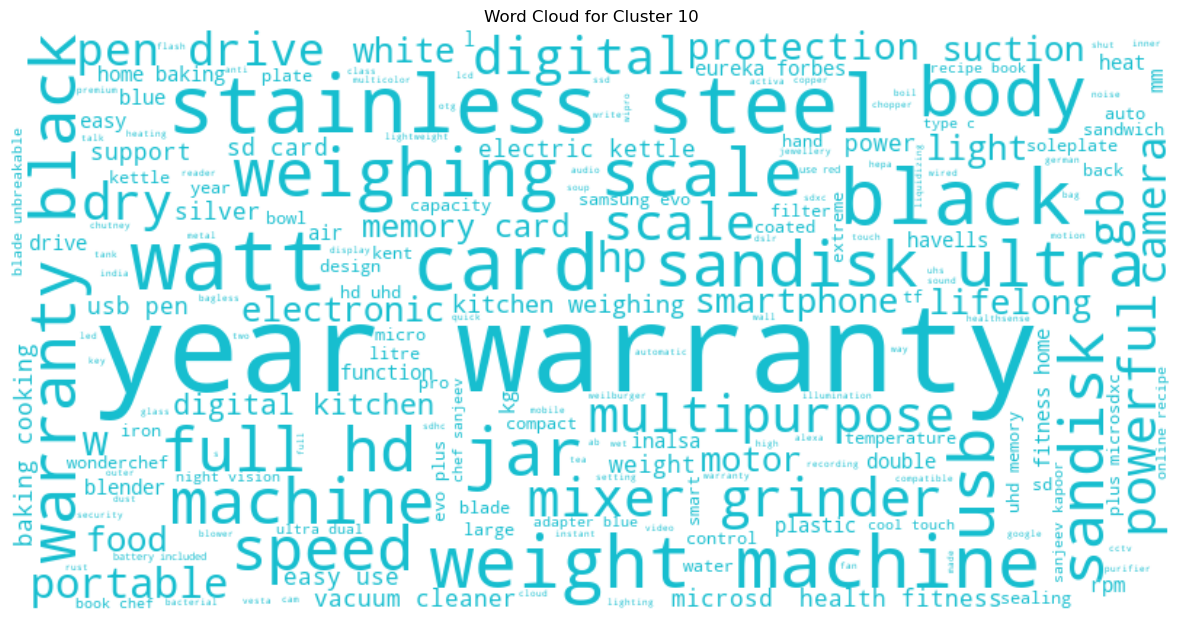

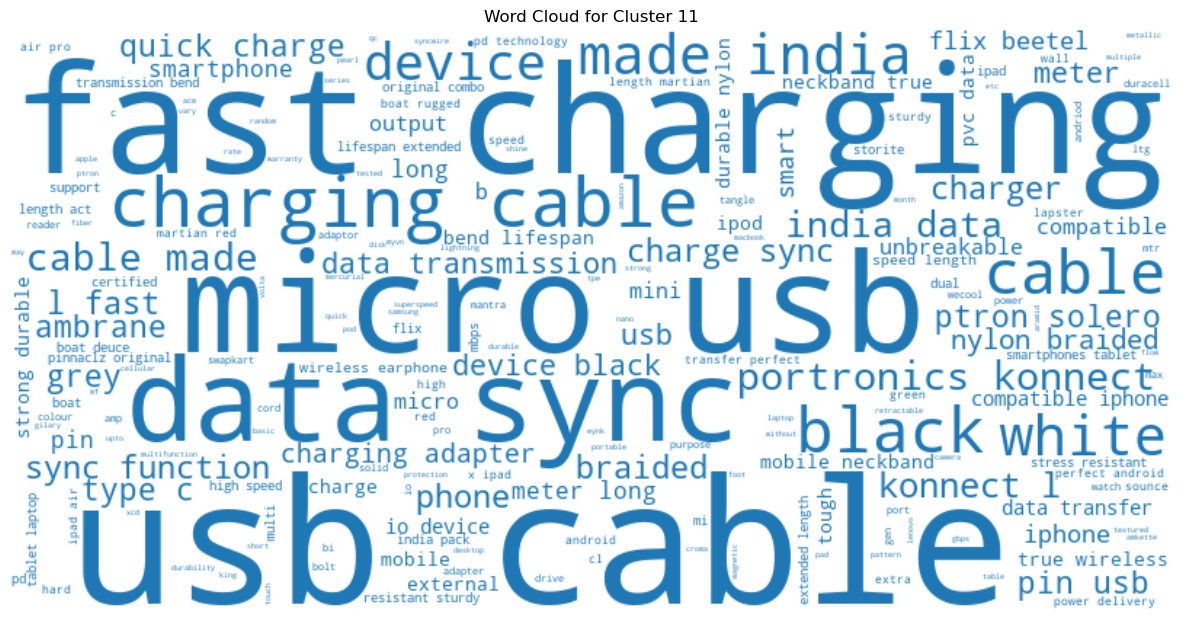

In [43]:
# Define a list of standard colors
standard_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                   '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create word clouds for each cluster
for cluster in range(k):
    # Get the descriptions for the current cluster
    cluster_description = df[df['cluster'] == cluster]['Description']
    # Combine all descriptions into a single string
    text = ' '.join(cluster_description)
    # Select color from standard_colors list (wrap around if more clusters than colors)
    color = standard_colors[cluster % len(standard_colors)]
    # Create and display the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10', color_func=lambda *args, **kwargs: color).generate(text)
    plt.figure(figsize=(15, 11))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster+1}')  # Adjust cluster number to start from 1
    plt.show()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmea

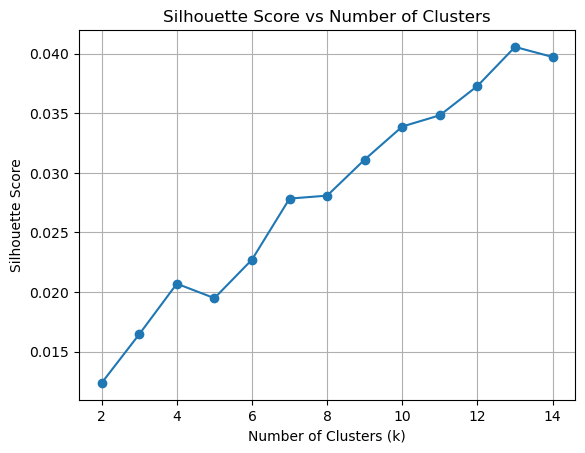

In [212]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define a range of possible values for k
k_range = range(2, 15)  # Adjust range as needed

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over each value of k
for k in k_range:
    # Apply KMeans clustering
    km = KMeans(n_clusters=k, random_state=42)
    df['cluster'] = km.fit_predict(vectorizer_matrix.toarray())
    
    # Calculate silhouette score
    score = silhouette_score(vectorizer_matrix.toarray(), df['cluster'])
    silhouette_scores.append(score)

# Plot silhouette scores for each value of k
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()


 ### Recommender systems:

In [12]:
# Import our regular old heroes 
import numpy as np
import pandas as pd
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficiency. 
import matplotlib.pyplot as plt
import seaborn as sns

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convenient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

In [67]:
# create the df for recommendation
features = ['product_id','CustomerID','rating','category','Description','review_title','review_content','img_link','product_link']
rec_df = df[features]
rec_df.head()

product_id                                         CustomerID  rating  \
0  B07JW9H4J1  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...     4.2   
1  B098NS6PVG  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...     4.0   
2  B096MSW6CT  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...     3.9   
3  B08HDJ86NZ  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...     4.2   
4  B08CF3B7N1  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...     4.2   

                                            category  \
0  Computers&Accessories|Accessories&Peripherals|...   
1  Computers&Accessories|Accessories&Peripherals|...   
2  Computers&Accessories|Accessories&Peripherals|...   
3  Computers&Accessories|Accessories&Peripherals|...   
4  Computers&Accessories|Accessories&Peripherals|...   

                                         Description  \
0  wayona nylon braided usb lightning fast chargi...   
1  ambrane unbreakable fast charging braided type...   
2  sounce fast phone charging cable data sync usb...   
3  boat deuce usb micro usb stress resistant stur...   
4  portronics konnect l fast charging pin usb cab...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [68]:
# Generate a unique anonymized ID for each CustomerID
unique_customer_ids = rec_df['CustomerID'].unique()
anonymized_ids = [f'{i+1}' for i in range(len(unique_customer_ids))]

# Create a mapping dictionary
customer_id_mapping = dict(zip(unique_customer_ids, anonymized_ids))

# Replace the original CustomerID with the anonymized ID
rec_df['CustomerID_1'] = rec_df['CustomerID'].map(customer_id_mapping)

# Display the updated DataFrame
rec_df

product_id                                         CustomerID  rating  \
0     B07JW9H4J1  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...     4.2   
1     B098NS6PVG  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...     4.0   
2     B096MSW6CT  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...     3.9   
3     B08HDJ86NZ  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...     4.2   
4     B08CF3B7N1  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...     4.2   
...          ...                                                ...     ...   
1460  B08L7J3T31  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...     4.0   
1461  B01M6453MB  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...     4.1   
1462  B009P2LIL4  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...     3.6   
1463  B00J5DYCCA  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...     4.0   
1464  B01486F4G6  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...     4.3   

                                               category  \
0     Computers&Accessories|Accessories&Peripherals|...   
1     Computers&Accessories|Accessories&Peripherals|...   
2     Computers&Accessories|Accessories&Peripherals|...   
3     Computers&Accessories|Accessories&Peripherals|...   
4     Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   

                                            Description  \
0     wayona nylon braided usb lightning fast chargi...   
1     ambrane unbreakable fast charging braided type...   
2     sounce fast phone charging cable data sync usb...   
3     boat deuce usb micro usb stress resistant stur...   
4     portronics konnect l fast charging pin usb cab...   
...                                                 ...   
1460  noir aqua pp spun filter spanner type ro water...   
1461  prestige delight prwo electric rice cooker l w...   
1462  bajaj majesty watt heat convector room heater ...   
1463     havells ventil air dsp exhaust fan pista green   
1464           borosil jumbo grill sandwich maker black   

                                           review_title  \
0     Satisfied,Charging is really fast,Value for mo...   
1     A Good Braided Cable for Your Type C Device,Go...   
2     Good speed for earlier versions,Good Product,W...   
3     Good product,Good one,Nice,Really nice product...   
4     As good as original,Decent,Good one for second...   
...                                                 ...   
1460  Received the product without spanner,Excellent...   
1461  ok,everything was good couldn't return bcoz I ...   
1462  very good,Work but front melt after 2 month,Go...   
1463  Fan Speed is slow,Good quality,Good product,go...   
1464  Works perfect,Ok good product,Nice Product. Re...   

                                         review_content  \
0     Looks durable Charging is fine tooNo complains...   
1     I ordered this cable to connect my phone to An...   
2     Not quite durable and sturdy,https://m.media-a...   
3     Good product,long wire,Charges good,Nice,I bou...   
4     Bought this instead of original apple, does th...   
...                                                 ...   
1460  I received product without spanner,Excellent p...   
1461  ok,got everything as mentioned but the measuri...   
1462  plastic but cool body ,u have to find sturdy s...   
1463  I have installed this in my kitchen working fi...   
1464  It does it job perfectly..only issue is temp c...   

                                               img_link  \
0     https://m.media-amazon.com/images/W/WEBP_40237...   
1     https://m.media-amazon.com/images/W/WEBP_40237...   
2     https://m.media-amazon.com/images/W/WE

In [69]:
rec_df['category'].unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [70]:
# Function to extract the last element from the category string
def extract_product_category(category_string):
    return category_string.split('|')[-1]

# Create a new column 'product_category'
rec_df['product_category'] = rec_df['category'].apply(extract_product_category)


In [71]:
rec_df['product_category'].unique()

array(['USBCables', 'WirelessUSBAdapters', 'HDMICables',
       'SmartTelevisions', 'RemoteControls', 'StandardTelevisions',
       'TVWall&CeilingMounts', 'RCACables', 'Mounts', 'OpticalCables',
       'Projectors', 'Adapters', 'SatelliteReceivers', 'DVICables',
       'SpeakerCables', 'StreamingClients', 'AVReceivers&Amplifiers',
       'TowerSpeakers', '3DGlasses', 'SmartWatches', 'PowerBanks',
       'Smartphones', 'MicroSD', 'BasicMobiles', 'In-Ear',
       'AutomobileChargers', 'Cradles', 'WallChargers', 'OTGAdapters',
       'Tripods', 'SelfieSticks', 'Stands', 'CableConnectionProtectors',
       'Décor', 'ScreenProtectors', 'StylusPens', 'Bedstand&DeskMounts',
       'BasicCases', 'HandlebarMounts', 'On-Ear', 'CameraPrivacyCovers',
       'PhoneCharms', 'Shower&WallMounts', 'PenDrives', 'Mice',
       'GraphicTablets', 'Lapdesks', 'NotebookComputerStands',
       'Keyboards', 'Condenser', 'DisposableBatteries',
       'GelInkRollerballPens', 'Tape', 'Keyboard&MouseSets',
      

## Content-based filtering 

### Implementation 

We now implement a simple collaborative filtering-based recommendation algorithm.

forming a utility matrix.

Using `pandas`, we can construct our utility matrix easily by using the `pivot_table` function:

In [72]:
rec_df.head()

product_id                                         CustomerID  rating  \
0  B07JW9H4J1  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...     4.2   
1  B098NS6PVG  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...     4.0   
2  B096MSW6CT  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...     3.9   
3  B08HDJ86NZ  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...     4.2   
4  B08CF3B7N1  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...     4.2   

                                            category  \
0  Computers&Accessories|Accessories&Peripherals|...   
1  Computers&Accessories|Accessories&Peripherals|...   
2  Computers&Accessories|Accessories&Peripherals|...   
3  Computers&Accessories|Accessories&Peripherals|...   
4  Computers&Accessories|Accessories&Peripherals|...   

                                         Description  \
0  wayona nylon braided usb lightning fast chargi...   
1  ambrane unbreakable fast charging braided type...   
2  sounce fast phone charging cable data sync usb...   
3  boat deuce usb micro usb stress resistant stur...   
4  portronics konnect l fast charging pin usb cab...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link CustomerID_1  \
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...            1   
1  https://www.amazon.in/Ambrane-Unbreakable-Char...            2   
2  https://www.amazon.in/Sounce-iPhone-Charging-C...            3   
3  https://www.amazon.in/Deuce-300-Resistant-Tang...            4   
4  https://www.amazon.in/Portronics-Konnect-POR-1...            5   

  product_category  
0        USBCables  
1        USBCables  
2        USBCables  
3        USBCables  
4        USBCables

Average rating in dataset: 3.875


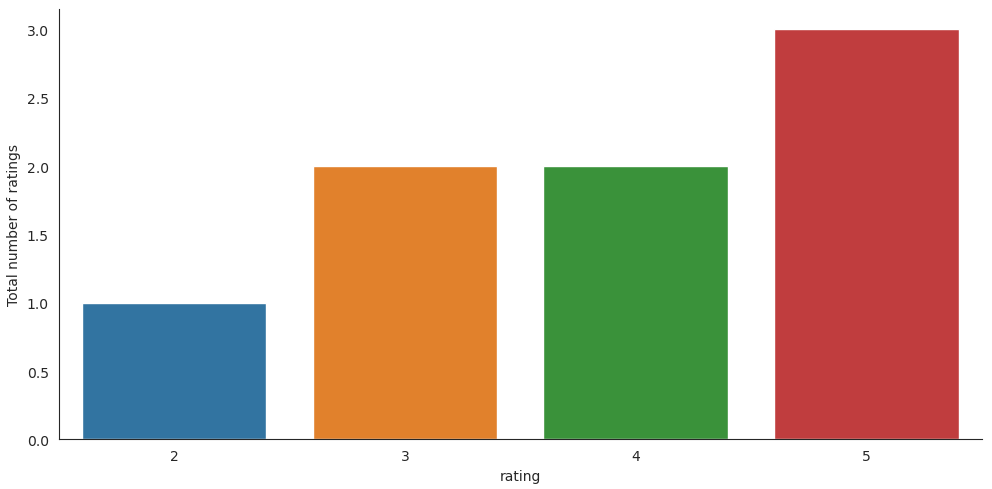

In [64]:
with sns.axes_style('white'):
    g = sns.catplot(data=rec_df, x="rating", y=None, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(rec_df["rating"])}')

### Implementation 

Let's implement a straightforward content filtering-based recommendation algorithm.

To begin, we need to gather the various properties of our items so that we can convert them into meaningful features. Following along from our example above, we're going to use the `Description` field for each product as a representation of properties such as genre, time-period, and target audience. We're also going to consider the `review_title` field.

We start off by creating a new column in our `product` dataframe called `descr_review`, which contains the above-motivated contents for each item. We additionally create two pandas series objects to help us translate between book titles and indexes of our dataframe.  

In [87]:
rec_df['descr_review'] = (pd.Series(rec_df[['Description', 'review_title']]
                      .fillna('')
                      .values.tolist()).str.join(' '))

# Convenient indexes to map between book titles and indexes of 
# the books dataframe
product_category = rec_df['product_category']
indices = pd.Series(rec_df.index, index=rec_df['product_category']).drop_duplicates()

In [88]:
indices

product_category
USBCables                      0
USBCables                      1
USBCables                      2
USBCables                      3
USBCables                      4
                            ... 
ElectricKettles             1457
ElectricHeaters             1458
LintShavers                 1459
WaterPurifierAccessories    1460
Rice&PastaCookers           1461
Length: 1459, dtype: int64

In [79]:
rec_df = rec_df.dropna()

We now need a mechanism to convert these textual features into a format that enables us to compute their relative similarities. This will allow us to translate our string-based collection of tags and authors into numerical vectors (see [here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for an overview of this process which is very similar to [count-based vectorization](https://youtu.be/W9VtEVBdgnQ)).

In [81]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0.0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a product,
# with TF-IDF features as columns 
tf_descReview_matrix = tf.fit_transform(rec_df['descr_review'])

We can now compute the similarity between each vector within our matrix. This is done by making use of the `cosine_similarity` function provided to us by `sklearn`.

In [82]:
cosine_sim = cosine_similarity(tf_descReview_matrix, 
                                        tf_descReview_matrix)
print (cosine_sim.shape)

(1459, 1459)


In [84]:
cosine_sim[:5]

array([[1.        , 0.14587956, 0.30886087, ..., 0.02814121, 0.07262275,
        0.04109497],
       [0.14587956, 1.        , 0.12784588, ..., 0.01403035, 0.06550918,
        0.02786463],
       [0.30886087, 0.12784588, 1.        , ..., 0.03195585, 0.05908312,
        0.02847256],
       [0.1107658 , 0.05502559, 0.12192055, ..., 0.03364577, 0.03503458,
        0.03356143],
       [0.14584987, 0.09750424, 0.11053436, ..., 0.01754816, 0.04737172,
        0.02907639]])

#### Top-N recommendations

With our content similarity matrix computed, we're now ready to make some recommendations! Let's begin by generating a top-N list of Product similar to the one which we prompt the system with.    

Following along from our earlier algorithmic explanation, we do this by: 

  1. Select an initial item (product) from which to generate recommendations. 
  2. Extract all the similarity values between the initial item and each other item in the similarity matrix.
  3. Sort the resulting values in descending order. 
  4. Select the top N similarity values and return the corresponding item details to the user. This is now our simple top-N list.  
  
We implement this algorithmic process in the function below:

In [137]:
import numpy as np  # Assuming cosine_sim is a NumPy array

def content_generate_top_N_recommendations(product_title, N=10):
 
  # Check if the product title exists in the indices
  if product_title not in indices:
    raise ValueError(f"Product title '{product_title}' not found in dataset.")

  # Convert the string product title to a numeric index for similarity matrix
  b_idx = indices[product_title]

  # Extract similarity scores
  sim_scores = np.asarray(cosine_sim[b_idx])

  # Check if there are any recommendations
  if not np.any(sim_scores):
    raise ValueError(f"No recommendations found for product '{product_title}'.")

  # Sort indices based on similarity scores (descending order)
  sorted_indices = sim_scores.argsort()[::-1]

  # Check if there are enough elements for recommendations
  if len(sim_scores) < N + 1:
    raise ValueError(f"Not enough recommendations found for '{product_title}'.")

  # Collect top-N indices (excluding the first element)
  product_indices = [i[0] for i in sorted_indices[1:N+1]]

  # Return top-N categories
  return rec_df['product_category'].iloc[product_indices]


In [138]:
# Example usage
top_recommendations = content_generate_top_N_recommendations("MixerGrinders", N=10)
print(top_recommendations)

1461    Rice&PastaCookers
1461    Rice&PastaCookers
1461    Rice&PastaCookers
1461    Rice&PastaCookers
1461    Rice&PastaCookers
1461    Rice&PastaCookers
1461    Rice&PastaCookers
1461    Rice&PastaCookers
1461    Rice&PastaCookers
1461    Rice&PastaCookers
Name: product_category, dtype: object
